# Analysis of consumer buying behavior

***


## **Objective:**

Analyze purchasing data for a website
* The data is in JSON format 


* On the website, each user logs in using their account and can purchase products as they browse the list of products offered. Each product has a sales value. Age and gender data for each user has been collected and is provided in the JSON file.

* We're going to analyze consumer buying behavior using the Python language Pandas package.
***






In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Load the file
load_file = "dados_compras.json"
purchase_file = pd.read_json(load_file, orient = "records")
purchase_file.head()

,Idade,Item ID,Login,Nome do Item,Sexo,Valor
0,38,164,Aelalis34,Bone Crushing Silver Skewer,Masculino,3.37
1,21,119,Eolo46,"Stormbringer, Dark Blade of Ending Misery",Masculino,2.32
2,34,174,Assastnya25,Primitive Blade,Masculino,2.46
3,21,92,Pheusrical25,Final Critic,Masculino,1.36
4,23,63,Aela59,Stormfury Mace,Masculino,1.27


In [117]:
df.count()

Age          780
Item_ID      780
Login        780
Item_Name    780
Sex          780
Price        780
Age Range    780
dtype: int64

In [3]:
df = purchase_file
df.columns = ['Age', 'Item_ID', 'Login', 'Item_Name', 'Sex', 'Price']
df.head(1)

,Age,Item_ID,Login,Item_Name,Sex,Price
0,38,164,Aelalis34,Bone Crushing Silver Skewer,Masculino,3.37


## Consumer Information

In [4]:

consumer = df.loc[:, ['Sex', 'Login', 'Age']]
consumer.head()

,Sex,Login,Age
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21
2,Masculino,Assastnya25,34
3,Masculino,Pheusrical25,21
4,Masculino,Aela59,23


In [5]:
#total_consumers
unique_consumer = consumer.drop_duplicates()
consumer_count = unique_consumer.count()[0]
consumer_count


573

In [6]:
unique_consumer['Sex'].value_counts()

Masculino                 465
Feminino                  100
Outro / NÃ£o Divulgado      8
Name: Sex, dtype: int64

In [7]:
pd.DataFrame({'Total of consumer':[consumer_count]})

,Total of consumer
0,573


## General Purchasing Analysis


In [8]:
df['Price'].describe()

count    780.000000
mean       2.931192
std        1.115780
min        1.030000
25%        1.960000
50%        2.880000
75%        3.910000
max        4.950000
Name: Price, dtype: float64

In [9]:
# Dataframe calculations 
total_exclusive_items = len(df['Item_ID'].unique())
sales_mean = df['Price'].mean()
total_item_count = df['Price'].count()
total_yield = df['Price'].sum()



In [96]:
# Dataframe for results
summary_calculations = pd.DataFrame({'Total Exclusive Itens':total_exclusive_items, 
                                     'Sales Mean': [sales_mean],
                                    'Total Item Count': total_item_count,
                                    'Total Yield': total_yield})

# Data Munging
summary_calculations = summary_calculations.round(2)
summary_calculations['Sales Mean'] = summary_calculations['Sales Mean'].map('${:.2f}'.format) 
summary_calculations['Total Yield'] = summary_calculations['Total Yield'].map('${:.2f}'.format)

#summary_calculations = summary_calculations.loc[:, ["Total Exclusive Items", "Sales Mean", "Total Item Count", "Total Yield"]]

summary_calculations

,Total Exclusive Itens,Sales Mean,Total Item Count,Total Yield
0,183,$2.93,780,$2286.33


In [11]:
# A numpy.ndarray of unique products purchased

df['Item_ID'].unique()

array([164, 119, 174,  92,  63,  10, 153, 169, 118,  99,  57,  47,  81,
        77,  44,  96, 123,  59,  91, 177,  78,   3,  11, 183,  65, 132,
       106,  49,  45, 155,  37,  48,  90,  13, 171,  25,   7, 124,  68,
        85, 120,  17, 141,  73, 151,  32, 165,  51, 101, 140,  31,  34,
         2,  86,  39,  28, 160, 134,  83,  38, 158, 110, 122,  54, 105,
        87,  23, 144, 128, 175,  46, 150, 152, 108, 172, 167, 181,  20,
       130, 111, 103,  30, 139, 173,  55, 115,  35,  42,   9,  84, 180,
       102,  53,  18,  74, 126,  50,  62, 125, 121, 129, 149,  12,  71,
        14,  58,  27,  52,  66, 100, 112,  24,  94, 107,   0, 182,  97,
        70,  89,   1, 170,  93, 179,  36,  75, 143, 137, 176, 148, 127,
       147, 161, 154, 157, 116,  61, 131,  41, 145,  60, 162, 135,   8,
        40,  15,  29,  72, 114, 117,  79,  88, 104,  95,  64,  98,  33,
        76, 146, 166,  56,  22,  21,  16,  67, 133,  69, 159,  82, 113,
         6, 163,   5,  19, 168, 136,  80,  26, 142, 178, 156, 10

## Demographic Analysis
Consumer demographics


In [12]:
consumer_demographics = consumer
consumer_demographics.head(2)

,Sex,Login,Age
0,Masculino,Aelalis34,38
1,Masculino,Eolo46,21


In [13]:
consumer_demographics['Age'].sort_values().unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       42, 43, 45], dtype=int64)

In [14]:
age_bins = [0, 9.99, 14.99, 19.99, 24.99, 29.99, 34.99, 39.99, 999]
age_brackets = ["Less than 10", "10 to 14", "15 to 19", "20 to 24", "25 to 29", "30 to 34", "35 to 39", "Higher than 40"]

df['Age Range'] = pd.cut(df['Age'], age_bins, labels=age_brackets)
df.head()



,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
0,38,164,Aelalis34,Bone Crushing Silver Skewer,Masculino,3.37,35 to 39
1,21,119,Eolo46,"Stormbringer, Dark Blade of Ending Misery",Masculino,2.32,20 to 24
2,34,174,Assastnya25,Primitive Blade,Masculino,2.46,30 to 34
3,21,92,Pheusrical25,Final Critic,Masculino,1.36,20 to 24
4,23,63,Aela59,Stormfury Mace,Masculino,1.27,20 to 24


In [114]:
age_demographic_count

Less than 10       28
10 to 14           35
15 to 19          133
20 to 24          336
25 to 29          125
30 to 34           64
35 to 39           42
Higher than 40     17
Name: Age Range, dtype: int64

In [115]:
consumer_count

573

In [118]:
# Dataframe calculations 
age_demographic_count = df['Age Range'].value_counts()
age_demographic_average_item_price = df.groupby(['Age Range']).mean()['Price']
age_demographic_total_item_price = df.groupby(['Age Range']).sum()['Price']
age_demographic_percent = (age_demographic_count / 780)*100 # consumer count is the sum of unique consumers 


In [119]:
age_demographic_percent = age_demographic_percent.sort_index()
age_demographic_percent

Less than 10       3.589744
10 to 14           4.487179
15 to 19          17.051282
20 to 24          43.076923
25 to 29          16.025641
30 to 34           8.205128
35 to 39           5.384615
Higher than 40     2.179487
Name: Age Range, dtype: float64

In [120]:
age_demographic_total_item_price = age_demographic_total_item_price.sort_index()
age_demographic_total_item_price

Age Range
Less than 10       83.46
10 to 14           96.95
15 to 19          386.42
20 to 24          978.77
25 to 29          370.33
30 to 34          197.25
35 to 39          119.40
Higher than 40     53.75
Name: Price, dtype: float64

In [121]:
age_demographic_average_item_price = age_demographic_average_item_price.sort_index()
age_demographic_average_item_price

Age Range
Less than 10      2.980714
10 to 14          2.770000
15 to 19          2.905414
20 to 24          2.913006
25 to 29          2.962640
30 to 34          3.082031
35 to 39          2.842857
Higher than 40    3.161765
Name: Price, dtype: float64

In [122]:
age_demographic_count = age_demographic_count.sort_index()
age_demographic_count

Less than 10       28
10 to 14           35
15 to 19          133
20 to 24          336
25 to 29          125
30 to 34           64
35 to 39           42
Higher than 40     17
Name: Age Range, dtype: int64

In [123]:
# Dataframe for results

age_demographic = pd.DataFrame({ "Score": age_demographic_count, 
                                 "%": age_demographic_percent,
                                 "Value per Unit": age_demographic_average_item_price, 
                                 "Total Purchase Value": age_demographic_total_item_price})


In [124]:
# Data Munging

age_demographic['Total Purchase Value'] = age_demographic['Total Purchase Value'].map('${:.2f}'.format)
age_demographic['Value per Unit'] = age_demographic['Value per Unit'].map('${:.2f}'.format)
age_demographic['%'] = age_demographic['%'].map('{:.2f}%'.format)




In [125]:
age_demographic


,Score,%,Value per Unit,Total Purchase Value
Age Range,,,,
Less than 10,28,3.59%,$2.98,$83.46
10 to 14,35,4.49%,$2.77,$96.95
15 to 19,133,17.05%,$2.91,$386.42
20 to 24,336,43.08%,$2.91,$978.77
25 to 29,125,16.03%,$2.96,$370.33
30 to 34,64,8.21%,$3.08,$197.25
35 to 39,42,5.38%,$2.84,$119.40
Higher than 40,17,2.18%,$3.16,$53.75


In [126]:
age_demographic.index

CategoricalIndex(['Less than 10', '10 to 14', '15 to 19', '20 to 24',
                  '25 to 29', '30 to 34', '35 to 39', 'Higher than 40'],
                 categories=['Less than 10', '10 to 14', '15 to 19', '20 to 24', '25 to 29', '30 to 34', '35 to 39', 'Higher than 40'], ordered=True, name='Age Range', dtype='category')

## Demographic Information by Gender
* Percentage and count of male buyers
* Percentage and count of female buyers
* Percentage and count of others / not disclosed

In [127]:
consumer_count

573

In [128]:
# The values present in Sex classification
consumer['Sex'].unique()

array(['Masculino', 'Feminino', 'Outro / NÃ£o Divulgado'], dtype=object)

In [129]:
gender_count = unique_consumer['Sex'].value_counts()
gender_count


Masculino                 465
Feminino                  100
Outro / NÃ£o Divulgado      8
Name: Sex, dtype: int64

In [130]:
gender_percent = (gender_count / consumer_count)*100
gender_percent

Masculino                 81.151832
Feminino                  17.452007
Outro / NÃ£o Divulgado     1.396161
Name: Sex, dtype: float64

In [131]:
# Dataframe for results

gender_demographics = pd.DataFrame({'Sex': gender_count,
                      "%": gender_percent})
gender_demographics

,Sex,%
Masculino,465,81.151832
Feminino,100,17.452007
Outro / NÃ£o Divulgado,8,1.396161


In [132]:
# Data Munging

gender_demographics = gender_demographics.round(2)
gender_demographics["%"] = gender_demographics["%"].map("{:,.1f}%".format)

gender_demographics

,Sex,%
Masculino,465,81.2%
Feminino,100,17.4%
Outro / NÃ£o Divulgado,8,1.4%


In [231]:
gender_total_item_price = df.groupby(['Sex']).sum()['Price'].rename('Total os Sales')
gender_total_item_average = df.groupby(['Sex']).mean()['Price'].rename('Average Price')
purchase_count = df.groupby(['Sex']).count()['Price'].rename('Number of Purchases')
normalize_total = gender_total_item_price / gender_demographics['Sex']

In [134]:
gender_total_item_price

Sex
Feminino                   382.91
Masculino                 1867.68
Outro / NÃ£o Divulgado      35.74
Name: Total os Sales, dtype: float64

In [135]:
gender_total_item_average

Sex
Feminino                  2.815515
Masculino                 2.950521
Outro / NÃ£o Divulgado    3.249091
Name: Average Price, dtype: float64

In [136]:
purchase_count

Sex
Feminino                  136
Masculino                 633
Outro / NÃ£o Divulgado     11
Name: Number of Purchases, dtype: int64

In [137]:
normalize_total

Feminino                  3.829100
Masculino                 4.016516
Outro / NÃ£o Divulgado    4.467500
dtype: float64

In [138]:
# Dataframe for results

gender_purchasing_analysis = pd.DataFrame({'Number of Purchases':purchase_count,
                                          'Average Price per Item':gender_total_item_average,
                                          'Total os Sales':gender_total_item_price,
                                          'Normalized Total':normalize_total})
gender_purchasing_analysis.head()

,Number of Purchases,Average Price per Item,Total os Sales,Normalized Total
Sex,,,,
Feminino,136,2.815515,382.91,3.829100
Masculino,633,2.950521,1867.68,4.016516
Outro / NÃ£o Divulgado,11,3.249091,35.74,4.467500


## Most Popular Consumers (Top 5)

In [139]:
# User dataset calculations
user_total = df.groupby(['Login']).sum()['Price'].rename('Total Purchase Value')
user_mean = df.groupby(['Login']).mean()['Price'].rename('Average Purchase Value')
user_count = df.groupby(['Login']).count()['Price'].rename('Number of Purchases')

In [140]:
# Dataframe for results
user_data = pd.DataFrame({'Total Purchase Value':user_total,
                         'Average Purchase Value':user_mean,
                         'Number of Purchases':user_count}) 

#The sorting should be used before the Data Muning, because after the data muning the formatted arrays became an object
user_data = user_data.sort_values('Total Purchase Value', ascending=False)
#user_data.dtypes

# Data Munging
user_data['Total Purchase Value'] = user_data['Total Purchase Value'].map('${:.2f}'.format)
user_data['Average Purchase Value'] = user_data['Average Purchase Value'].map('${:.2f}'.format)

user_data.dtypes

Total Purchase Value      object
Average Purchase Value    object
Number of Purchases        int64
dtype: object

In [219]:
user_data.head()

,Total Purchase Value,Average Purchase Value,Number of Purchases
Login,,,
Undirrala66,$17.06,$3.41,5
Saedue76,$13.56,$3.39,4
Mindimnya67,$12.74,$3.18,4
Haellysu29,$12.73,$4.24,3
Eoda93,$11.58,$3.86,3


## Most Popular Items

In [142]:
df.head(1)

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
0,38,164,Aelalis34,Bone Crushing Silver Skewer,Masculino,3.37,35 to 39


In [143]:
# User dataset calculations
product_total = df.groupby(['Item_Name']).sum()['Price'].rename('Total Purchase Value')
product_average = df.groupby(['Item_Name']).mean()['Price'].rename('Average Purchase Value')
product_count = df.groupby(['Item_Name']).count()['Item_ID'].rename('Number of Purchases')

# Dataframe for results

product_data = pd.DataFrame({'Total Purchase Value':product_total,
                            'Average Purchase Value':product_average,
                            'Number of Purchases':product_count})


#Data muning

product_data['Total Purchase Value'] = product_data['Total Purchase Value'].map('${:.2f}'.format)
product_data['Average Purchase Value'] = product_data['Average Purchase Value'].map('${:.2f}'.format)



# For the sorting by 'Number of Purchases' is possible to do affter the data muning, because this is a int64

#TOP 5 selling products
product_data.sort_values('Number of Purchases', ascending=False).head()
#product_data.dtypes

,Total Purchase Value,Average Purchase Value,Number of Purchases
Item_Name,,,
Final Critic,$38.60,$2.76,14
Arcane Gem,$24.53,$2.23,11
"Betrayal, Whisper of Grieving Widows",$25.85,$2.35,11
Stormcaller,$34.65,$3.46,10
Woeful Adamantite Claymore,$11.16,$1.24,9


## Most Profitable Items

In [144]:
# User dataset calculations
product_total = df.groupby(['Item_Name']).sum()['Price'].rename('Total Purchase Value')
product_average = df.groupby(['Item_Name']).mean()['Price'].rename('Average Purchase Value')
product_count = df.groupby(['Item_Name']).count()['Item_ID'].rename('Number of Purchases')

# Dataframe for results

product_data = pd.DataFrame({'Total Purchase Value':product_total,
                            'Average Purchase Value':product_average,
                            'Number of Purchases':product_count})
#Sorting
product_data = product_data.sort_values('Total Purchase Value', ascending=False)

#Data muning

product_data['Total Purchase Value'] = product_data['Total Purchase Value'].map('${:.2f}'.format)
product_data['Average Purchase Value'] = product_data['Average Purchase Value'].map('${:.2f}'.format)


In [145]:
#YOP 5 Most Profitable Items
product_data.head()

,Total Purchase Value,Average Purchase Value,Number of Purchases
Item_Name,,,
Final Critic,$38.60,$2.76,14
Retribution Axe,$37.26,$4.14,9
Stormcaller,$34.65,$3.46,10
Spectral Diamond Doomblade,$29.75,$4.25,7
Orenmir,$29.70,$4.95,6


# Grafical analysis

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [189]:
i = pd.DataFrame(unique_consumer['Sex'].value_counts())
i = i.rename({'Masculino':'Male', 'Feminino':'Female', 'Outro / NÃ£o Divulgado': 'Uninformed'})

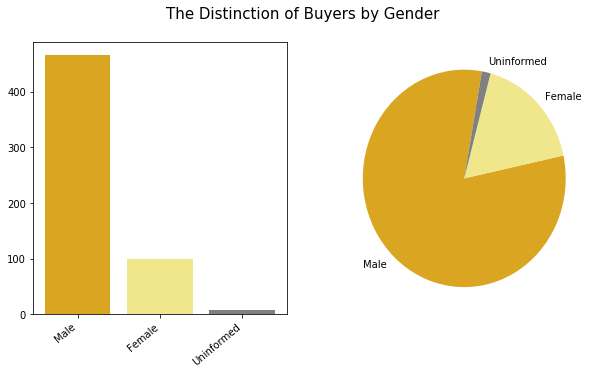

In [192]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('The Distinction of Buyers by Gender', size=15)


ax1 = fig.add_subplot(1,2,1) #add_subplot(nrows, ncols, index, **kwargs)
ax1 = plt.bar(i.index, i['Sex'], color=("goldenrod", 'khaki', 'grey'))
ax1 = plt.xticks(rotation=40, horizontalalignment=('right'))


ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(i['Sex'], labels = i.index, colors = ("goldenrod", 'khaki', 'grey'), startangle=80)

plt.show()


"Score": age_demographic_count, 
                                 "%": age_demographic_percent,
                                 "Value per Unit": age_demographic_average_item_price, 
                                 "Total Purchase Value": age_demographic_total_item_price}

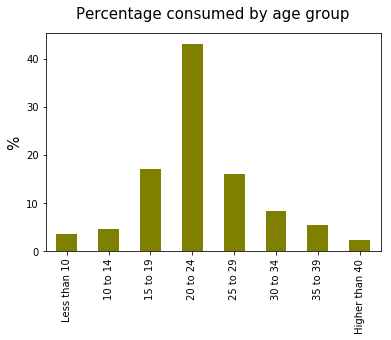

In [149]:
percent_by_age = plt.Figure(figsize=(10,5))
age_demographic_percent.plot(kind='bar', color='olive')
plt.ylabel('%', size=15)
plt.title('Percentage consumed by age group', pad=15, size=15)


plt.show()

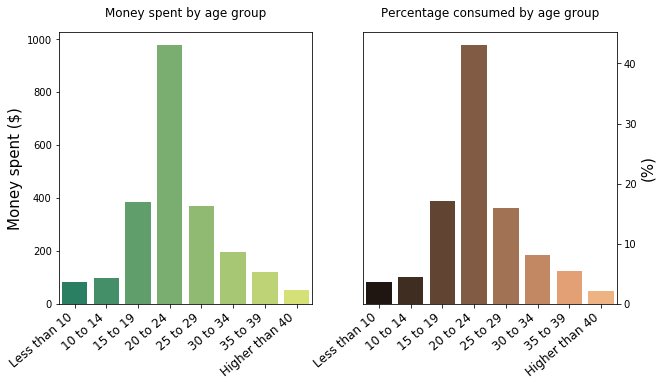

In [150]:
fig = plt.figure(figsize=(10,5))

#Green chat
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=age_demographic_total_item_price.index, y=age_demographic_total_item_price, palette='summer')
plt.xticks(rotation=40, horizontalalignment='right', size=12)
plt.ylabel('Money spent ($)', size=15)
plt.title('Money spent by age group', pad=15, size=12)
plt.xlabel('')

#Brown chart
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.barplot(x=age_demographic_percent.index, y=age_demographic_percent, palette='copper')
plt.xticks(rotation=40, horizontalalignment='right', size=12)
plt.ylabel('(%)', size=15)
plt.title('Percentage consumed by age group', pad=15, size=12)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')




In [152]:
age_demographic

,Score,%,Value per Unit,Total Purchase Value
Age Range,,,,
Less than 10,28,3.59%,$2.98,$83.46
10 to 14,35,4.49%,$2.77,$96.95
15 to 19,133,17.05%,$2.91,$386.42
20 to 24,336,43.08%,$2.91,$978.77
25 to 29,125,16.03%,$2.96,$370.33
30 to 34,64,8.21%,$3.08,$197.25
35 to 39,42,5.38%,$2.84,$119.40
Higher than 40,17,2.18%,$3.16,$53.75


Number of Purchases


product_data = pd.DataFrame({'Total Purchase Value':product_total,
                            'Average Purchase Value':product_average,
                            'Number of Purchases':product_count})

In [153]:
product_total[product_total>29.6].sort_values(ascending=False)

Item_Name
Final Critic                  38.60
Retribution Axe               37.26
Stormcaller                   34.65
Spectral Diamond Doomblade    29.75
Orenmir                       29.70
Name: Total Purchase Value, dtype: float64

In [154]:
i = product_data['Number of Purchases'][0:5]
i

Item_Name
Final Critic                  14
Retribution Axe                9
Stormcaller                   10
Spectral Diamond Doomblade     7
Orenmir                        6
Name: Number of Purchases, dtype: int64

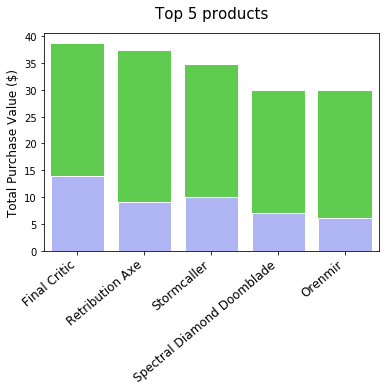

In [155]:
j = product_total[product_total>29.6].sort_values(ascending=False)

#Green bar - Value $
sns.barplot(x=j.index, y=j, color='#50e03a')

#Grey bar - Number of Purchases
sns.barplot(x=i.index, y=i, color='#a3acff', edgecolor='white')


plt.xticks(rotation=40, size=12, horizontalalignment='right')
plt.xlabel('')
plt.ylabel('Total Purchase Value ($)', size=12)
plt.title('Top 5 products', size=15, pad=15)

plt.show()


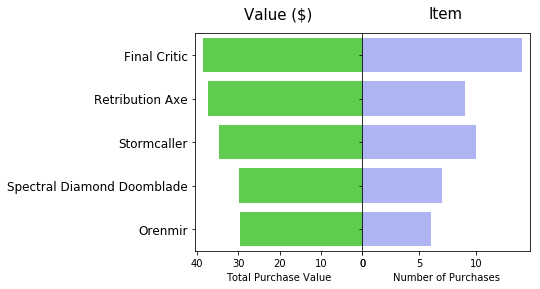

In [156]:
fig_2, axes = subplots(ncols=2, sharey=True)
plt.subplots_adjust(wspace=0)


#increse the size in the Y tick
axes[0].tick_params(axis = 'y', labelsize = 12)



#Green bar - Value $
sns.barplot(y=j.index, x=j, color='#50e03a', ax=axes[0])

#Grey - count intem
sns.barplot(y=i.index, x=i, color='#a3acff', ax=axes[1])

#invert the frist chart
axes[0].invert_xaxis()



#show tick labels in the middle
#axes[0].yaxis.tick_right()

#Labels
axes[0].set_title('Value ($)', size=15, pad=15)
axes[1].set_title('Item', size=15, pad=15)

axes[0].set(ylabel='')
axes[1].set(ylabel='')


plt.show()



In [157]:
#Top five producs (sorted by Total Purchase Value)
product_data.head()

,Total Purchase Value,Average Purchase Value,Number of Purchases
Item_Name,,,
Final Critic,$38.60,$2.76,14
Retribution Axe,$37.26,$4.14,9
Stormcaller,$34.65,$3.46,10
Spectral Diamond Doomblade,$29.75,$4.25,7
Orenmir,$29.70,$4.95,6


In [158]:
user = user_data.reset_index()
user = user.sort_values('Login')
user.head()

,Login,Total Purchase Value,Average Purchase Value,Number of Purchases
403,Adairialis76,$2.46,$2.46,1
69,Aduephos78,$6.70,$2.23,3
102,Aeduera68,$5.80,$1.93,3
401,Aela49,$2.46,$2.46,1
550,Aela59,$1.27,$1.27,1


In [159]:
df2=df.drop_duplicates('Login')
df2=df2.sort_values('Login')
df2.head()

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
144,20,44,Adairialis76,Bonecarvin Battle Axe,Masculino,2.46,20 to 24
308,37,79,Aduephos78,"Alpha, Oath of Zeal",Masculino,2.88,35 to 39
224,26,106,Aeduera68,Crying Steel Sickle,Masculino,2.29,25 to 29
394,25,44,Aela49,Bonecarvin Battle Axe,Masculino,2.46,25 to 29
4,23,63,Aela59,Stormfury Mace,Masculino,1.27,20 to 24


In [204]:
user_master_data = user.join(df2.set_index('Login'), on='Login' )
user_master_data.head()


,Login,Total Purchase Value,Average Purchase Value,Number of Purchases,Age,Item_ID,Item_Name,Sex,Price,Age Range
403,Adairialis76,$2.46,$2.46,1,20,44,Bonecarvin Battle Axe,Masculino,2.46,20 to 24
69,Aduephos78,$6.70,$2.23,3,37,79,"Alpha, Oath of Zeal",Masculino,2.88,35 to 39
102,Aeduera68,$5.80,$1.93,3,26,106,Crying Steel Sickle,Masculino,2.29,25 to 29
401,Aela49,$2.46,$2.46,1,25,44,Bonecarvin Battle Axe,Masculino,2.46,25 to 29
550,Aela59,$1.27,$1.27,1,23,63,Stormfury Mace,Masculino,1.27,20 to 24


In [161]:
# Function that will remove the comma from the price values 
# https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', ''))
    return(x)


In [203]:
user_master_data['Average Purchase Value'] = user_master_data['Average Purchase Value'].apply(clean_currency).astype(str)
user_master_data['Total Purchase Value'] = user_master_data['Total Purchase Value'].apply(clean_currency).astype(str)
user_master_data.head()


,Login,Total Purchase Value,Average Purchase Value,Number of Purchases,Age,Item_ID,Item_Name,Sex,Price,Age Range
403,Adairialis76,2.46,2.46,1,20,44,Bonecarvin Battle Axe,Masculino,2.46,20 to 24
69,Aduephos78,6.70,2.23,3,37,79,"Alpha, Oath of Zeal",Masculino,2.88,35 to 39
102,Aeduera68,5.80,1.93,3,26,106,Crying Steel Sickle,Masculino,2.29,25 to 29
401,Aela49,2.46,2.46,1,25,44,Bonecarvin Battle Axe,Masculino,2.46,25 to 29
550,Aela59,1.27,1.27,1,23,63,Stormfury Mace,Masculino,1.27,20 to 24


In [163]:
# Sex most relevant btween the 20 to 24 age range
age_range_20to24 = user_master_data.query('25 > Age > 19')

#check if there are duplicated Login
age_range_20to24.duplicated().describe()

count       259
unique        1
top       False
freq        259
dtype: object

In [164]:
age_range_20to24_gender = age_range_20to24['Sex'].value_counts()

In [165]:
age_range_20to24_gender

Masculino                 217
Feminino                   40
Outro / NÃ£o Divulgado      2
Name: Sex, dtype: int64

In [166]:
age_range_20to24_gender = age_range_20to24_gender.rename(index={'Masculino':'Male','Feminino':'Female', 'Outro / NÃ£o Divulgado':'Uninformed' })
age_range_20to24_gender

Male          217
Female         40
Uninformed      2
Name: Sex, dtype: int64

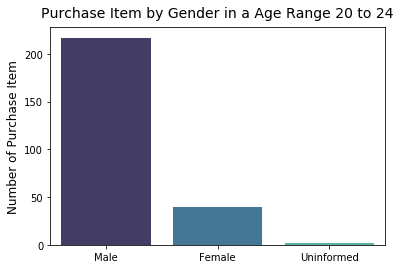

In [179]:
sns.barplot(x=age_range_20to24_gender.index, y=age_range_20to24_gender, palette='mako')
plt.ylabel('Number of Purchase Item', size=12)
plt.title('Purchase Item by Gender in a Age Range 20 to 24', size=14, pad=10)

plt.show()

# 

In [195]:
## Find the ID to the Top 5 Itemns
# There are 2 itemn with 2 IDs

In [208]:
df[df['Item_Name'] == 'Final Critic'].head(1)

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
3,21,92,Pheusrical25,Final Critic,Masculino,1.36,20 to 24


In [210]:
df[df['Item_Name'] == 'Retribution Axe'].head(1)

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
57,24,34,Alallo58,Retribution Axe,Masculino,4.14,20 to 24


In [214]:
df[df['Item_Name'] == 'Stormcaller'].head(1)
                                         

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
101,25,30,Assistasda90,Stormcaller,Masculino,4.15,25 to 29


In [215]:
df[df['Item_Name'] == 'Spectral Diamond Doomblade'].head(2)

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
107,29,115,Undirrala66,Spectral Diamond Doomblade,Masculino,4.25,25 to 29
250,25,115,Ilogha82,Spectral Diamond Doomblade,Masculino,4.25,25 to 29


In [218]:
df[df['Item_Name'] == 'Orenmir'].head(1)

,Age,Item_ID,Login,Item_Name,Sex,Price,Age Range
50,32,32,Saistyphos30,Orenmir,Feminino,4.95,30 to 34


In [201]:
# which sex most present among the best selling items
# Top 5 = [Final Critic, Retribution Axe, Stormcaller,Spectral Diamond Doomblade, Orenmir]
item_id_top5 = user_master_data.query('Item_ID == [92, 101, 34, 30, 180, 115, 32]')
item_id_top5 = item_id_top5['Sex'].value_counts()
item_id_top5 = item_id_top5.rename(index={'Masculino':'Male','Feminino':'Female', 'Outro / NÃ£o Divulgado':'Uninformed' })



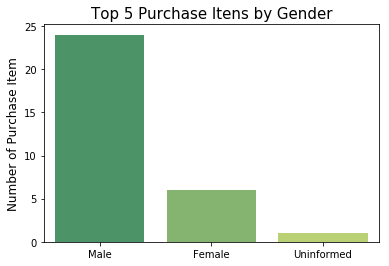

In [202]:
# barchart
sns.barplot(x=item_id_top5.index, y=item_id_top5, palette='summer')
plt.ylabel('Number of Purchase Item', size=12)
plt.title('Top 5 Purchase Itens by Gender', size=15)

plt.show()


# Final conclusions

### **1. Consumer Count**

•	Total of consumer = 573

### **2. General Purchasing Analysis**

•	Total Exclusive Itens = 183

•	Average purchase price = $ 2.93

•	Total Item Count = 780

•	Total Yield = $2286.33

### **3. Demographic Information by Gender**

•	Percentage and count of male, female and uninformed buyers



| Gender | Count	| % |
| --- | ------ | --- |
| Male | 465 | 81.2% |
Female |	   100 |	 17.4%
Uniformed	| 8	 | 1.4%

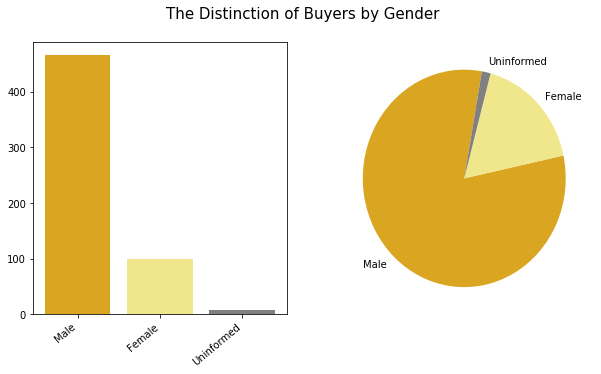

**Figure 1.** Distribution of users gender.
* By this data presented on this table, we can conclude the Male is the most present gender among the consumers



#### **3.1. Analysis of Purchases by Gender**


| Age Range    |  Number of purchases |   Age group shopping (%)    | Value per Unit (\$)  | Total Purchase Value (\$)|
| ------------ | -------------------- | --------------------------- | -------------------- | ------- |
| Less than 10 |28                    |3.58                         |2.98                  |83.46 |
| 10 to 14     |35                    |4.48                         | 2.77                 |96.95|
|15 to 19      |133                   |17.05                        |2.91                  |386.42|
|20 to 24      |336                   |43.07                        |2.91                  |978.77|
|25 to 29      |125                   |16.02                        |2.96                  |370.33|
|30 to 34      |64                    |8.2                          |3.08                  |197.25|
|35 to 39      |42                    |5.38                         |2.84                  |119.40|
|Higher than 40|17                    |2.17                         |3.16                  | 53.75|


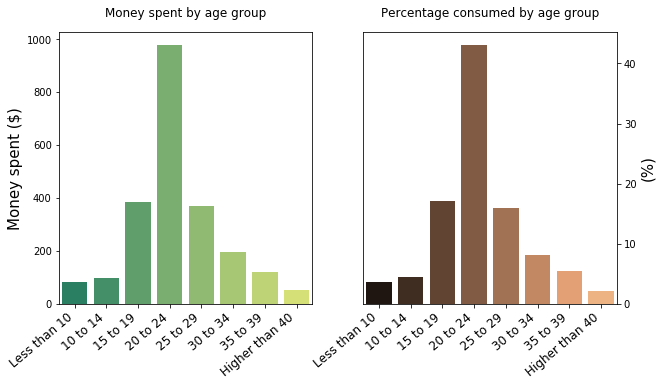

**Figure 2.** Graphical representation of consuming by age range: Money spend and Percent of the total consume






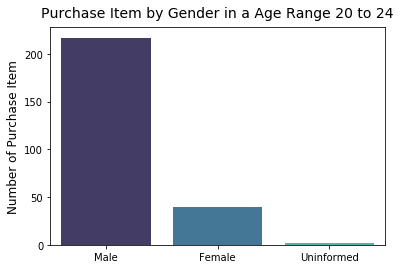

**Figure 3.** Distribution of the number of items purchased by gender at the age group 20 to 24.
##### Secction conclusion:
* The most representative consumer age group is between 15 and 29 years old, representing 76% of the total consumed, which corresponds to the US $ 1402.22.

* The age group of 20 to 24 represent more than 40% of the total consume, which corresponds to the US $ 978.77.
* The tick value is similar to among all age groups.
* The Male consum represent 3 times more than Female in the most representative age group 20 to 24.

### 4. Identification of the 5 most profitable/polular items. 
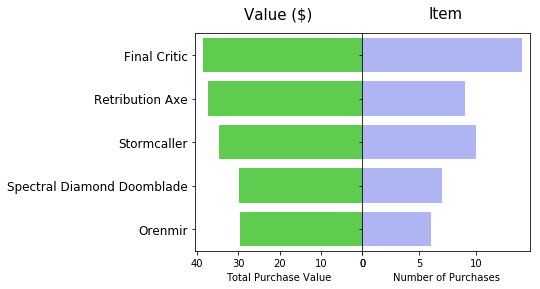

**Figure 4.** Top 5 items. Representation of the total purchase value and counting purchases. Organized from top to bottom the item more to the less profitable.

	
| Item_Name                 |Total Purchase Value (\$)|Average Purchase Value (\$)| Number of Purchases |
| ------------------------- | ----------------------- | ------------------------- | ------------------- |
|Final Critic               | 38.60                   | 2.76                   |	14|
|Retribution Axe            | 37.26                   | 4.14                   |	9|
|Stormcaller                | 34.65                   | 3.46                   |	10|
|Spectral Diamond Doomblade | 29.75                   | 4.25                   |	7|
|Orenmir                    | 29.70                   | 4.95                   |	6|

##### Secction conclusion:
* The most profitable item, Final Critic, is also the most purchased item. However, this behavior is not linear, due to the analysis between the second (Retribution Axe) and third (Stormcaller) most profitable items. The Retribution Axe item in figure 4 has a higher profit with less products than sold than the Stormcaller item.
* This behavior can be associated with the item ticket value, been the Retribution Axe little more expensive than the Stormcaller.

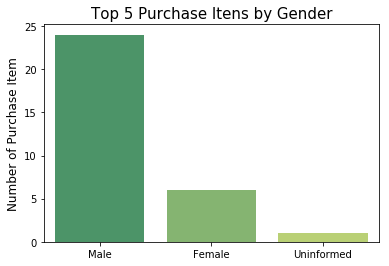

**Figure 5.** Top 5 items distributed by gender. 
* This behavior can be related to the higher presence of Male gender among the buyers. Corroborating with the data shown by the age group 20 to 24. 

### 5. Identification of the 5 buyers by the total purchase value

	
|Login      |Total Purchase Value (\$)|	Average Purchase Value (\$)   |	Number of Purchases| Gender |
|-----------|-----------------------------|---------------------------|--------------------|--------|
Undirrala66     |17.06	                  |3.41      	              |5                   |male|
Saedue76	    |13.56	                  |3.39	                      |4                   |male|
Mindimnya67	    |12.74                    |3.18	                      |4                   |female|
Haellysu29	    |12.73	                  |4.24	                      |3                   |male|
Eoda93	        |11.58	                  |3.86	                      |3                   |male|

* How was expected from the above analysis the male gender is prevalent also on the top five buyers.
* However, it should be taken into account that, although the presence of the female gender is significantly lower in all parameters evaluated, the female gender has a representative among the largest buyers with the average ticket (Total Purchase Value (\$)) similar to those of the male gender.